## Holiday Package Prediction

In this Notebook, I am going to implement Adaboost Machine Learning Algorithm on a Dataset called Holiday Package Prediction.  

## Problem Statement  
Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.  

Link to the Dataset : https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction

In [1]:
## importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
## loading the dataset
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Data Clearning

1. Handling Missing Values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [3]:
df.shape

(4888, 20)

In [4]:
## checking for null values
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

It means that the dataset is not cleaned and contains Null values.

Note - Always check each features to avoid any kind of errors.

In [5]:
## Checking for Gender
df["Gender"].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

There are two categories - Male and Female and another one is "Fe Male". "Fe male" can be combined into Female. It might be a spelling mistake.

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

Similarly here, "Single" can be conbined with "Unmarried".  

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [8]:
## Replacing the values
df['Gender'] = df['Gender'].replace("Fe Male", "Female")
df['MaritalStatus'] = df['MaritalStatus'].replace("Singe", "Unmarried")

In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
## Handling the missing values
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1] ## checking for atleast one Nan value.

## Finding the percentage of missing values
for features in features_with_na:
    print(features, ":", np.round(df[features].isnull().mean()*100, 3)) 

Age : 4.624
TypeofContact : 0.511
DurationOfPitch : 5.135
NumberOfFollowups : 0.921
PreferredPropertyStar : 0.532
NumberOfTrips : 2.864
NumberOfChildrenVisiting : 1.35
MonthlyIncome : 4.767


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [12]:
## describe the dataset
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


From above as we see from "mean" row and "50%", there are some outliers but not in large amount.

### Imputing Null Values
1. Impute Median -> Age, DurationofPitch, NumberOfTrips, MonthlyIncome
2. Impute Mode -> TypeOfContract, NumberOfFollowups, PreferredPropertyStar, NumberOfChildrenVisiting

In [13]:
## Imputing values

## Age Column
df['Age'].fillna(df["Age"].median(), inplace = True)

## Duration of Pitch
df['DurationOfPitch'].fillna(df["DurationOfPitch"].median(), inplace = True)

## Number of Trips
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace = True)

## Monthly Income
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace = True)

## TypeOFContract
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace = True)

## NumberOfFollowups
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace = True)

## PreferredPropertyStar
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace = True)

## NumberofChildrenVisiting
df["NumberOfChildrenVisiting"].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace = True)

In [14]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

There are no Nan Values which means our dataset is cleaned.

In [15]:
## Dropping Customer ID as its not relevant
df.drop("CustomerID", inplace = True, axis = 1)

One thing to notice - there is a column named "NumberOfPersonVisiting" and a column "NumberOfChildrenVisiting".  
To reduce the number of features, I am going to combine these two features

In [16]:
df['TotalVisitors'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']

In [17]:
## Now dropping the columns -> NumberofChildrenVisiting and NumberofPersonVisiting
df.drop(columns=['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], inplace=True)

In [18]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisitors
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [19]:
## Numerical Features
num_features = [features for features in df.columns if df[features].dtype != "O"]
num_features

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalVisitors']

In [20]:
## Categorical Features
cat_features = [features for features in df.columns if df[features].dtype == "O"]
cat_features

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [21]:
## Discrete Features
discrete_features = [features for features in num_features if len(df[features].unique()) <= 25]
discrete_features

['ProdTaken',
 'CityTier',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'TotalVisitors']

In [22]:
## Continous Features
continous_features = [features for features in num_features if features not in discrete_features]
continous_features

['Age', 'DurationOfPitch', 'MonthlyIncome']

### Model Building

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis = 1)
y = df['ProdTaken']

In [24]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [25]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisitors
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [26]:
## seperating dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

## create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = "first")

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [28]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisitors'],
      dtype='object'))])

In [29]:
## applying transformation into training set
X_train_transformed = preprocessor.fit_transform(X_train)

In [30]:
X_train_transformed

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]], shape=(3910, 27))

In [31]:
X_test_transformed = preprocessor.transform(X_test)

In [32]:
X_test_transformed

array([[ 0.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.73751038, -0.77415132],
       [ 1.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.6704111 , -0.06526803],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.4208322 , -0.77415132],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
         0.69001249,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.22827818, -0.77415132],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.44611323,  2.06138184]], shape=(978, 27))

## Random Forest Classifier

In [33]:
## importing required libraries and its tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_auc_score, recall_score, f1_score

In [52]:
## building the model
models = {
    "Adaboost Classifier" : AdaBoostClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier()
}

for model_name, model in models.items():
    #model = list(models.values())[i]
    model.fit(X_train_transformed, y_train) ## model training


    ## Making predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)


    ## Training set Performance
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")  # fix here
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    ## Test set Performance
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(f"Model: {model_name}")

    print("Model Performance for Training set-")
    
    print("Accuracy: {:.4f}".format(train_accuracy))
    print("F1 Score: {:.4f}".format(train_f1))
    print("Precision: {:.4f}".format(train_precision))
    print("Recall Score: {:.4f}".format(train_recall))
    print("ROC AUC Curve: {:.4f}".format(train_rocauc_score))

    print()
    print("Model Performance for Test set-")

    print("Accuracy: {:.4f}".format(test_accuracy))
    print("F1 Score: {:.4f}".format(test_f1))
    print("Precision: {:.4f}".format(test_precision))
    print("Recall Score: {:.4f}".format(test_recall))
    print("ROC AUC Curve: {:.4f}".format(test_rocauc_score))

    print("-------------------------------------")

Model: Adaboost Classifier
Model Performance for Training set-
Accuracy: 0.8458
F1 Score: 0.8126
Precision: 0.7603
Recall Score: 0.2524
ROC AUC Curve: 0.6171

Model Performance for Test set-
Accuracy: 0.8364
F1 Score: 0.7986
Precision: 0.7719
Recall Score: 0.2304
ROC AUC Curve: 0.6069
-------------------------------------
Model: Decision Tree
Model Performance for Training set-
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall Score: 1.0000
ROC AUC Curve: 1.0000

Model Performance for Test set-
Accuracy: 0.9049
F1 Score: 0.9042
Precision: 0.7663
Recall Score: 0.7382
ROC AUC Curve: 0.8418
-------------------------------------
Model: Random Forest
Model Performance for Training set-
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall Score: 1.0000
ROC AUC Curve: 1.0000

Model Performance for Test set-
Accuracy: 0.9162
F1 Score: 0.9083
Precision: 0.9580
Recall Score: 0.5969
ROC AUC Curve: 0.7953
-------------------------------------


### Hyperparameter Tuning the Model

In [47]:
## making paramters grid
rf_params = {
    "max_depth" : [5, 8, 15, None, 10],
    "max_features" : [5, 7, 8, "auto"],
    "min_samples_split" : [2, 8, 15, 20],
    "n_estimators" : [100, 200, 500, 1000]
}

adaboost_params = {
    "n_estimators" : [50, 60, 70, 80, 90],
    "algorithm" : ["SAMME"]
}

In [48]:
## models list for hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
    ("AB", AdaBoostClassifier(), adaboost_params)
]

In [49]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                    param_distributions = params,
                                    n_iter = 100,
                                    cv = 3,
                                    verbose = 2,
                                    n_jobs=-1)
    random.fit(X_train_transformed, y_train)
    model_param[name] = random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [50]:
## getting the best model parameters
for model_name in model_param:
    print(f"-------Best params for {model_name}-------")
    print(model_param[model_name])

-------Best params for RF-------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
-------Best params for AB-------
{'n_estimators': 60, 'algorithm': 'SAMME'}


Now since we have got the best parameters for the model using Randomized Search Cross Validation, we will again train the model by putting those parameters.

In [53]:
## retraining the model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=7, max_depth=None),
    "Adaboost" : AdaBoostClassifier(n_estimators=60, algorithm="SAMME")
}

for model_name, model in models.items():
    #model = list(models.values())[i]
    model.fit(X_train_transformed, y_train) ## model training


    ## Making predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)


    ## Training set Performance
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")  # fix here
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    ## Test set Performance
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(f"Model: {model_name}")

    print("Model Performance for Training set-")
    
    print("Accuracy: {:.4f}".format(train_accuracy))
    print("F1 Score: {:.4f}".format(train_f1))
    print("Precision: {:.4f}".format(train_precision))
    print("Recall Score: {:.4f}".format(train_recall))
    print("ROC AUC Curve: {:.4f}".format(train_rocauc_score))

    print()
    print("Model Performance for Test set-")

    print("Accuracy: {:.4f}".format(test_accuracy))
    print("F1 Score: {:.4f}".format(test_f1))
    print("Precision: {:.4f}".format(test_precision))
    print("Recall Score: {:.4f}".format(test_recall))
    print("ROC AUC Curve: {:.4f}".format(test_rocauc_score))

    print("-------------------------------------")


Model: Random Forest
Model Performance for Training set-
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall Score: 1.0000
ROC AUC Curve: 1.0000

Model Performance for Test set-
Accuracy: 0.9254
F1 Score: 0.9201
Precision: 0.9403
Recall Score: 0.6597
ROC AUC Curve: 0.8248
-------------------------------------
Model: Adaboost
Model Performance for Training set-
Accuracy: 0.8529
F1 Score: 0.8223
Precision: 0.8056
Recall Score: 0.2785
ROC AUC Curve: 0.6315

Model Performance for Test set-
Accuracy: 0.8374
F1 Score: 0.8003
Precision: 0.7759
Recall Score: 0.2356
ROC AUC Curve: 0.6095
-------------------------------------


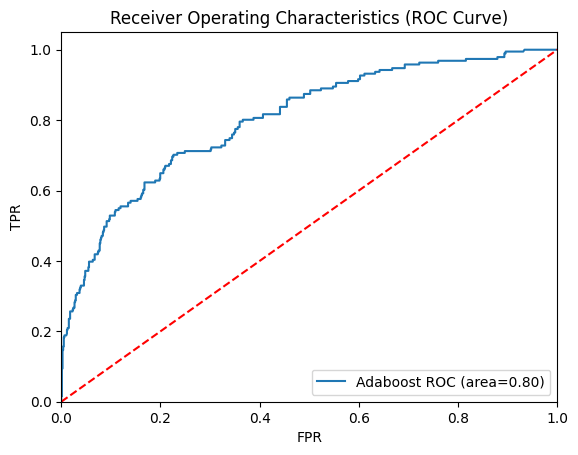

In [55]:
## Plotting ROC AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve, auc
plt.figure()

## Creating a pipeline in which we directly put the Model for which we want to see AUC ROC Curve
auc_models = [
    {
        "label" : "Adaboost",
        "model" : AdaBoostClassifier(n_estimators=60, algorithm="SAMME"),
        "auc" : 0.8320
    }
]

for m in auc_models:
    model = m['model']
    model.fit(X_train_transformed, y_train)

    ## Computing FPR, TPR and Thresholds
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_transformed)[:, 1])
    
    ## Calculate Area under the Curve to display the plot
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{m['label']} ROC (area={roc_auc:.2f})")

plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.title("Receiver Operating Characteristics (ROC Curve)")
plt.legend(loc = "lower right")
plt.show()

In [56]:
print(classification_report(y_test, model.predict(X_test_transformed)))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       787
           1       0.78      0.24      0.36       191

    accuracy                           0.84       978
   macro avg       0.81      0.61      0.63       978
weighted avg       0.83      0.84      0.80       978

